<a href="https://colab.research.google.com/github/sangramch/MNIST-Encoder-Decoder-Network/blob/master/AutoEncoder_CNN%2BANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Input,Flatten,LeakyReLU,Reshape
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets
from sklearn.model_selection import train_test_split

In [0]:
(X_train_loaded, y_train), (X_test_loaded, y_test) = tensorflow.keras.datasets.mnist.load_data()

#normalization
X_train_loaded=X_train_loaded.astype("float32")/255.0
X_test_loaded=X_test_loaded.astype("float32")/255.0

#reshape to match input shape
X_train=X_train_loaded.reshape(60000,28,28,1)
X_test=X_test_loaded.reshape(10000,28,28,1)

#train validation split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

In [3]:
#encoder definition

enc_in=Input(shape=(28,28,1))

enc_conv_l1=Conv2D(32,kernel_size=3,padding="same")(enc_in)
enc_act_l1=LeakyReLU()(enc_conv_l1)

enc_conv_l2=Conv2D(16,kernel_size=5,padding="same")(enc_act_l1)
enc_act_l2=LeakyReLU()(enc_conv_l2)

enc_flatten=Flatten()(enc_act_l2)

enc_den_l1=Dense(128)(enc_flatten)
enc_act_l3=LeakyReLU()(enc_den_l1)

enc_den_l2=Dense(8)(enc_act_l3)
enc_act_l4=LeakyReLU()(enc_den_l2)

encoder=Model(enc_in,enc_act_l4)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        12816     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               160576

In [4]:
#decoder definition

dec_in=Input(shape=(8))

dec_den_l1=Dense(8)(dec_in)
dec_act_l1=LeakyReLU()(dec_den_l1)

dec_den_l2=Dense(128)(dec_act_l1)
dec_act_l2=LeakyReLU()(dec_den_l2)

dec_den_l3=Dense(12544)(dec_act_l2)
dec_act_l3=LeakyReLU()(dec_den_l3)

dec_reshape=Reshape((28,28,16))(dec_act_l3)

dec_conv_l1=Conv2D(32,kernel_size=3,padding='same')(dec_reshape)
dec_act_l5=LeakyReLU()(dec_conv_l1)

dec_conv_l2=Conv2D(16,kernel_size=3,padding='same')(dec_act_l5)
dec_act_l6=LeakyReLU()(dec_conv_l2)

dec_conv_l3=Conv2D(1,kernel_size=3,padding='same')(dec_act_l6)
dec_act_l7=LeakyReLU()(dec_conv_l3)

decoder=Model(dec_in,dec_act_l7)
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1152      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 12544)             1618176   
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 12544)             0   

In [5]:
#combined encoder decoder model for training
enc_dec_input=Input(shape=(28,28,1))
enc_dec_encout=encoder(enc_dec_input)
enc_dec_output=decoder(enc_dec_encout)

enc_dec_model=Model(enc_dec_input,enc_dec_output)
enc_dec_model.compile(loss="mse",optimizer=Adam())
enc_dec_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Model)                (None, 8)                 1619928   
_________________________________________________________________
model_1 (Model)              (None, 28, 28, 1)         1628809   
Total params: 3,248,737
Trainable params: 3,248,737
Non-trainable params: 0
_________________________________________________________________


In [6]:
#first train only decoder, then only encoder, and finally both together

encoder.trainable=False
enc_dec_model.fit(X_train,X_train,epochs=7,validation_data=(X_val,X_val),batch_size=512)
encoder.trainable=True

decoder.trainable=False
enc_dec_model.fit(X_train,X_train,epochs=8,validation_data=(X_val,X_val),batch_size=512)
decoder.trainable=True

enc_dec_model.fit(X_train,X_train,epochs=15,validation_data=(X_val,X_val),batch_size=512)

Epoch 1/7
106/106 [==============================] - 3s 26ms/step - loss: 0.0544 - val_loss: 0.0388
Epoch 2/7
106/106 [==============================] - 2s 23ms/step - loss: 0.0326 - val_loss: 0.0281
Epoch 3/7
106/106 [==============================] - 2s 23ms/step - loss: 0.0259 - val_loss: 0.0243
Epoch 4/7
106/106 [==============================] - 2s 23ms/step - loss: 0.0234 - val_loss: 0.0227
Epoch 5/7
106/106 [==============================] - 2s 23ms/step - loss: 0.0220 - val_loss: 0.0217
Epoch 6/7
106/106 [==============================] - 2s 23ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 7/7
106/106 [==============================] - 2s 23ms/step - loss: 0.0200 - val_loss: 0.0197
Epoch 1/8
106/106 [==============================] - 2s 23ms/step - loss: 0.0192 - val_loss: 0.0190
Epoch 2/8
106/106 [==============================] - 2s 23ms/step - loss: 0.0184 - val_loss: 0.0186
Epoch 3/8
106/106 [==============================] - 2s 23ms/step - loss: 0.0180 - val_loss: 0.0180


In [0]:
encoded=encoder.predict(X_test)
decoded=decoder.predict(encoded)

In [0]:
%matplotlib inline

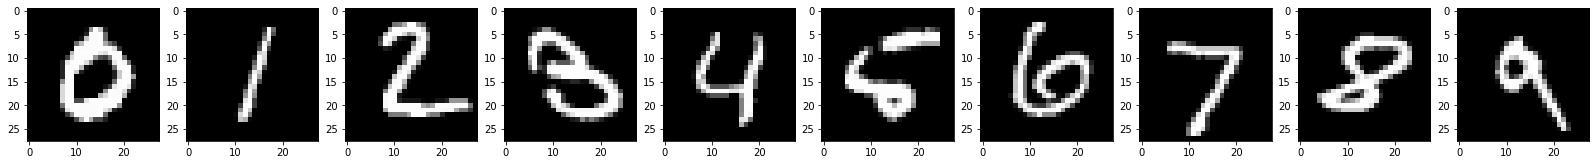

In [9]:
#plot original images from 1 to 10

fig=plt.figure(figsize=(28,28))

indices=list()

for i in range(10):
    j=0;
    while(y_test[j]!=i):
        j+=1

    indices.append(j)
    fig.add_subplot(1,10,i+1)
    plt.imshow(X_test[j].reshape(28,28),cmap='gray')


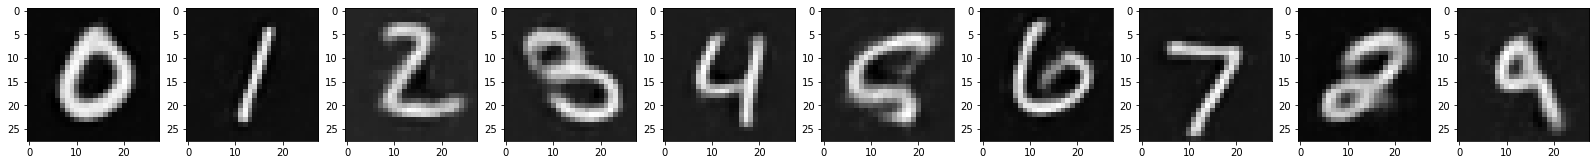

In [10]:
#plot generated images from 1 to 10

fig2=plt.figure(figsize=(28,28))

for i in range(10):
    fig2.add_subplot(1,10,i+1)
    plt.imshow(decoded[indices[i]].reshape(28,28),cmap='gray')